# Plots of wind and solar energy processed data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

label = ['South West', 'South East', 'Greater London']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']
wind_solar_column_energy = ['SouthWest.Wind+Solar (MWh)','SouthEast.Wind+Solar (MWh)','GreaterLondon.Wind+Solar (MWh)']

df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
    df_proc[wind_solar_column_energy[i]] = df_proc_sheet['Wind MWh']+df_proc_sheet['Solar MWh']
df_proc = df_proc.set_index('date')

In [2]:
df_proc_h = df_proc.groupby(df_proc.index.hour).mean()
df_proc_h_std = df_proc.groupby(df_proc.index.hour).std()
df_proc_h

,SouthWest.Wind (MWh),SouthWest.Solar (MWh),SouthWest.Demand (MWh),SouthEast.Wind (MWh),SouthEast.Solar (MWh),SouthEast.Demand (MWh),GreaterLondon.Wind (MWh),GreaterLondon.Solar (MWh),GreaterLondon.Demand (MWh)
date,,,,,,,,,
0,1191.483851,0.000000,2267.061459,1489.008492,0.000000,3623.763031,657.516826,0.000000,1652.354539
1,1198.836931,0.000000,2212.498741,1460.937900,0.000000,3536.547769,674.496851,0.000000,1612.586338
2,1201.069574,0.000000,2205.229590,1398.278879,0.000000,3524.928463,635.003338,0.000000,1607.288195
3,1218.507099,0.000000,2153.726605,1409.440023,0.000000,3442.604001,644.728462,0.000000,1569.750090
4,1218.878368,21.719284,2128.649159,1405.727223,43.095147,3402.519193,587.321072,9.886941,1551.472318
5,1229.343442,180.773466,2126.162065,1418.830463,232.198828,3398.543722,597.569896,189.845734,1549.659593
6,1270.557488,368.191131,2248.197784,1449.635969,432.410059,3593.610568,645.360442,374.774795,1638.605692
7,1345.087540,648.664630,2525.639847,1618.307067,747.723126,4037.085220,730.614475,668.086245,1840.820172
8,1510.068331,1026.642872,2789.850697,1892.995889,1215.271090,4459.410563,835.938664,1068.504191,2033.391041


## Direct plot of processed data

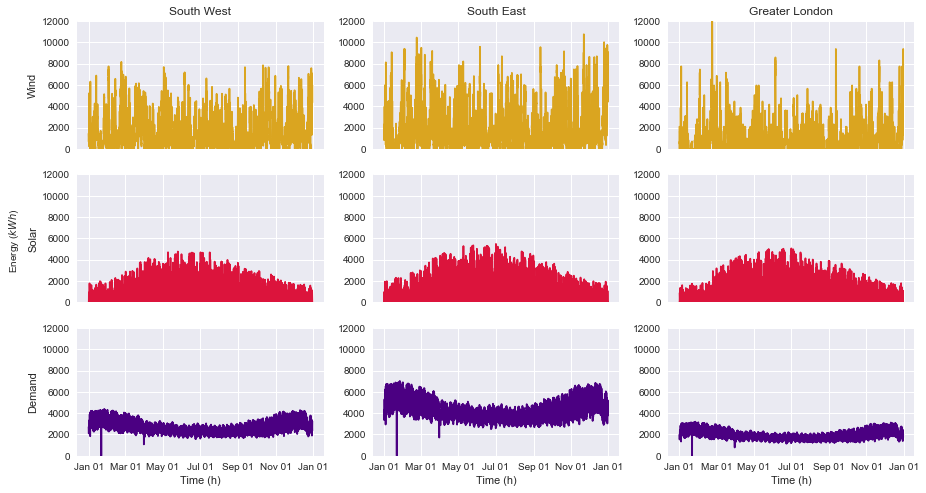

In [4]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(3,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    y = df_proc[wind_column_energy[i]]
    axx.set_ylim(0,12000)
    axx.plot(y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,12000)
    y = df_proc[solar_column_energy[i]]
    axx.plot(y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    y = df_proc[demand_column_energy[i]]
    axx.plot(y,label=label[i],color=deficit_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Demand")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
    axx.set_xlabel('Time (h)')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
fig.text(0.06, 0.5, energy_label, va='center', rotation='vertical')
plt.savefig("processed_data_hourly_wind_speed_solar_demand_energy.png")

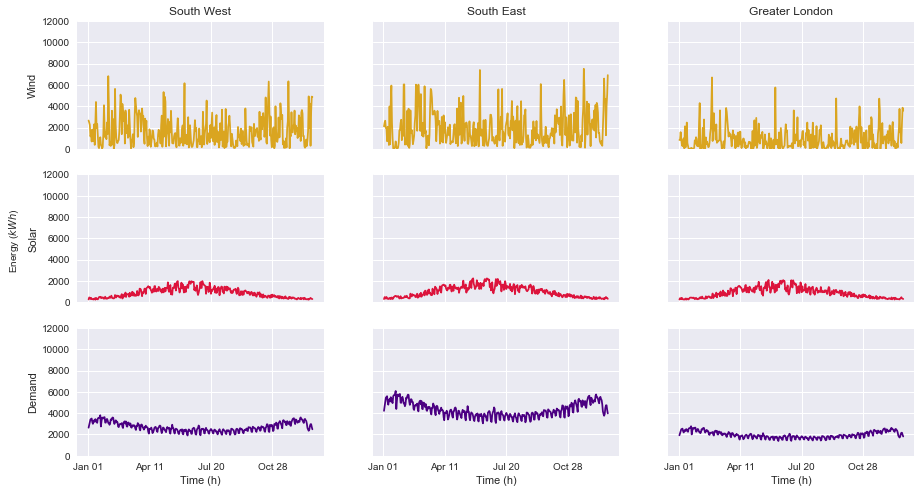

In [75]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(3,3,figsize=(15,8), sharex=True, sharey=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    y = df_proc[wind_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.set_ylim(0,12000)
    axx.plot(y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,12000)
    y = df_proc[solar_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    y = df_proc[demand_column_energy[i]].groupby(df_proc.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=deficit_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Demand")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
    axx.set_xlabel('Time (h)')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
fig.text(0.06, 0.5, energy_label, va='center', rotation='vertical')
plt.savefig("processed_data_hourly_wind_speed_solar_demand_energy.png")

## Plot hourly distributions (means)

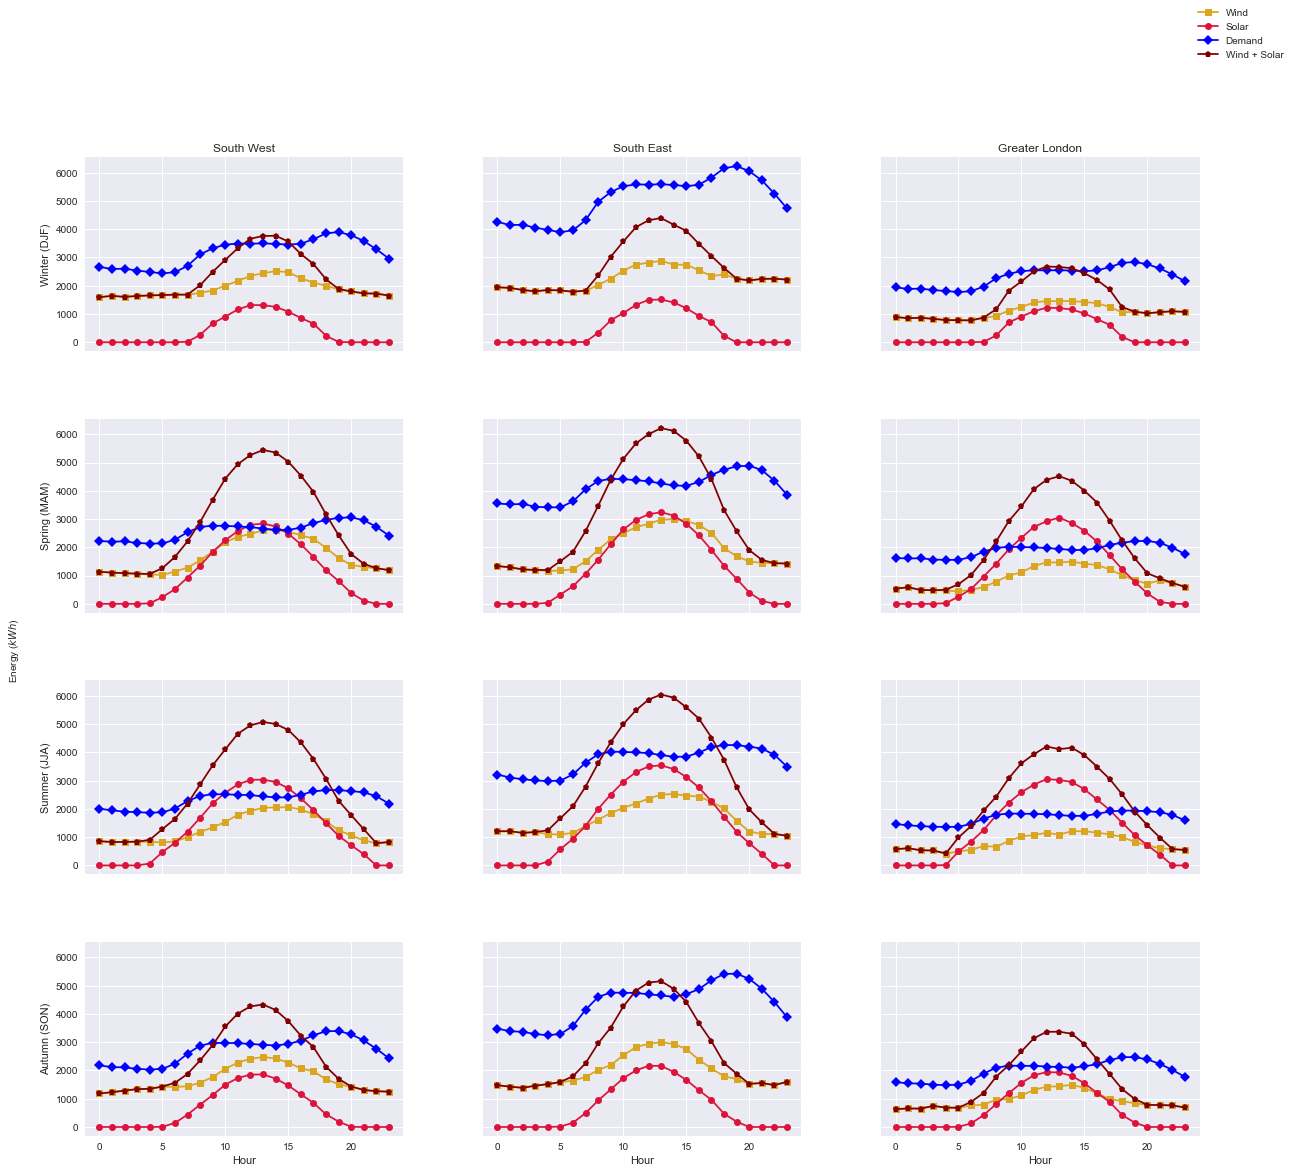

In [47]:
mpl.style.use('seaborn')
#create figure, and axes

#winter is DJF
winter = {'label':'Winter (DJF)', 'plot_pos':0,
          'period':((df_proc.index >= datetime(2020, 12, 1)) | (df_proc.index < datetime(2020, 3, 1)) )}
spring = {'label':'Spring (MAM)', 'plot_pos':1,
          'period':((df_proc.index >= datetime(2020, 3, 1)) & (df_proc.index < datetime(2020, 6, 1)))}
summer = {'label':'Summer (JJA)', 'plot_pos':2,
          'period':((df_proc.index >= datetime(2020, 6, 1)) & (df_proc.index < datetime(2020, 9, 1)) )}
autumn = {'label':'Autumn (SON)', 'plot_pos':3,
          'period':((df_proc.index >= datetime(2020, 9, 1)) & (df_proc.index < datetime(2020, 12, 1)))}

fig,ax =  plt.subplots(4,3,figsize=(18,18), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    j = season['plot_pos']
    df_season = df_proc[season['period']]
    df_season_hourly =  df_season.groupby(df_season.index.hour).mean()
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'s-',label=wind_energy_label,color=wind_color)
        if i == 0:
            ax[j][i].set_ylabel(season['label'])
    for i in [0,1,2]:
        y=df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'o-',label=solar_energy_label,color=solar_color)
    for i in [0,1,2]:
        y=df_season_hourly[demand_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'D-',label=demand_label,color=demand_color)
    for i in [0,1,2]:
        y=df_season_hourly[wind_column_energy[i]]+df_season_hourly[solar_column_energy[i]]
        x=df_season_hourly.index
        ax[j][i].plot(x,y,'p-',label=wind_solar_energy_label,color=wind_solar_color)
        if j==0:
            ax[j][i].title.set_text(label[i])
        if j==3:
            ax[j][i].set_xlabel('Hour')
handles, labels = ax[j][2].get_legend_handles_labels()
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
fig.text(0.01, 0.5, energy_label, va='center', rotation='vertical')
fig.legend(handles, labels, loc='upper right')
plt.savefig("hourly_distribution_wind_solar_demand_NO_SHADE_SEASON.png")

## Plot Hourly distributions (Median + quantiles)


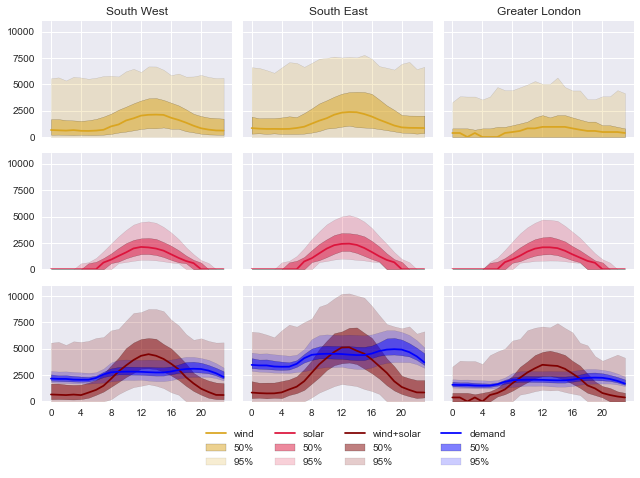

In [192]:
def plot_median_quantiles(y,x,ax,params):
    color, ylim, ylabel, xlabel,legend, (i,j), imax = params['color'], params['ylim'],params['ylabel'],params['xlabel'],params['legend'], params['pos'], params['imax']
    bounds_75 = y.groupby(x).quantile(0.75)
    bounds_25 = y.groupby(x).quantile(0.25)
    bounds_975 = y.groupby(x).quantile(0.975)
    bounds_025 = y.groupby(x).quantile(0.025)
    y_median = y.groupby(x).median()
    line1, = ax.plot(y_median,color=color,label=legend)
    line2 = ax.fill_between(x=bounds_25.index,y1=bounds_25,y2=bounds_75,alpha=0.5,color=color,edgecolor = "black",label="50%")
    line3 = ax.fill_between(x=bounds_025.index,y1=bounds_025,y2=bounds_975,alpha=0.2,color=color, edgecolor = "black",label="95%")
    ax.set_ylim(ylim)
    if i==0:
        ax.title.set_text(label[j])
    #plt.legend(title='Smoker', loc='upper right', labels=['Hell Yeh', 'Nah Bruh'])
    return line1, line2, line3

    
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(9,6),sharex=True,sharey=True)
for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'xlim':[0,4,8,12,16,20,24],'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Hour",'legend':"wind",'pos':(0,j),'imax':2}
    params_solar = {'color':solar_color,'xlim':(0,7500),'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Hour",'legend':"solar",'pos':(1,j),'imax':2}
    params_demand = {'color':demand_color,'xlim':(0,7500),'ylim':(0,11000),'ylabel':energy_label,'xlabel':"Hour",'legend':"demand",'pos':(2,j),'imax':2}
    params_wind_solar = {'color':wind_solar_color,'xlim':(0,7500),'ylim':(0,11000),'ylabel':energy_label,'xlabel':"Hour",'legend':"wind+solar",'pos':(2,j),'imax':2}    
    wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][j],params_wind)
    sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][j],params_solar)
    ws1,ws2,ws3 = plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[2][j],params_wind_solar)
    dem1,dem2,dem3 = plot_median_quantiles(y_demand,y_demand.index.hour,ax[2][j],params_demand)
    
for i,j in [(i,j) for i in [0,1,2] for j in [0,1,2]]:
    ax[i][j].set_xticks([0,4,8,12,16,20])

fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3,ws1,ws2,ws3,dem1,dem2,dem3],
                bbox_to_anchor=(.8,-0.11), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)

plt.tight_layout()
plt.savefig("hourly_distribution_wind_solar_demand.png")

## Plot monthly distributions (Median + quantiles)

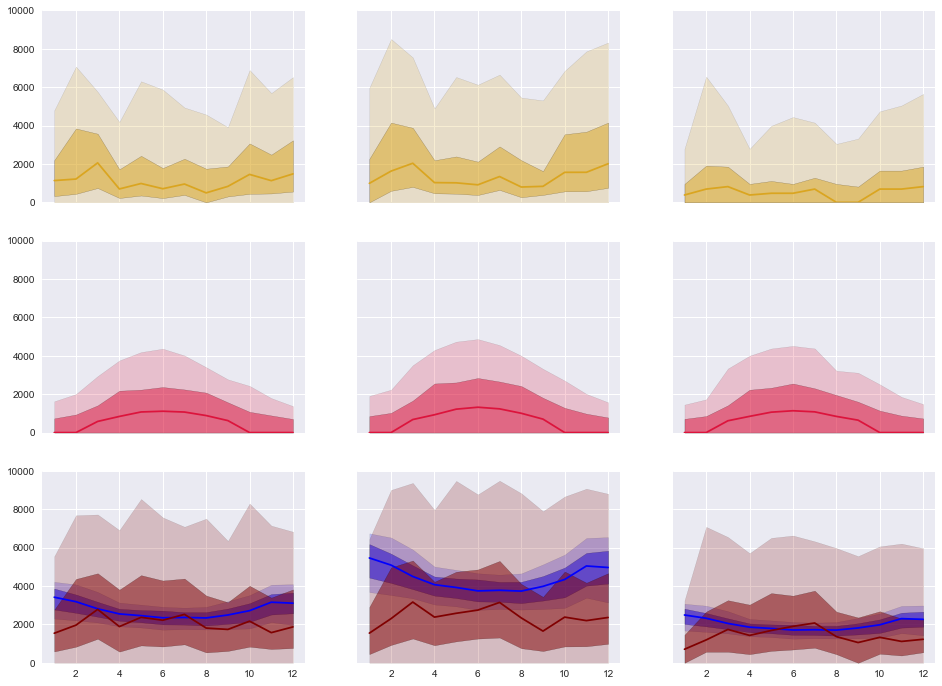

In [189]:

#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,3,figsize=(16,12),sharex=True,sharey=True)

for j in [0,1,2]:
    y_wind = df_proc[wind_column_energy[j]]
    y_solar = df_proc[solar_column_energy[j]]
    y_demand = df_proc[demand_column_energy[j]]
    y_wind_solar = y_solar + y_wind
    params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j),'imax':2}
    params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j),'imax':2}
    params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j),'imax':2}
    params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j),'imax':2}
    plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

plt.savefig("monthly_distribution_wind_solar_demand.png")

## Plot hourly distributions (Median + quantiles) PER SEASON

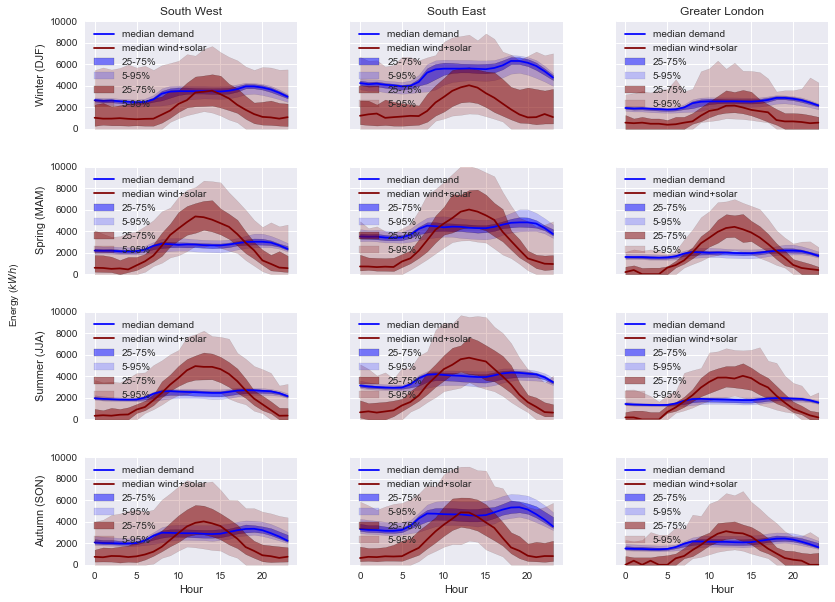

In [17]:
fig,ax =  plt.subplots(4,3,figsize=(12,10), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column_energy[j]]
        y_solar = df_season[solar_column_energy[j]]
        y_demand = df_season[demand_column_energy[j]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color, 'ylim':(0,7500),
                       'xlabel':"Hour", 'ylabel':season['label'],
                       'legend':"wind",'pos':(i,j),'imax':3}
        params_solar = {'color':solar_color, 'ylim':(0,7500),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"solar", 'pos':(i,j),'imax':3}
        params_demand = {'color':demand_color,'ylim':(0,10000),
                         'xlabel':"Hour",'ylabel':season['label'],
                         'legend':"demand",'pos':(i,j),'imax':3}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),
                             'xlabel':"Hour",'ylabel':season['label'],
                             'legend':"wind+solar",'pos':(i,j),'imax':3}
        #plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][i],params_wind)
        #plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][i],params_solar)
        plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png")
#fig.legend(handles, labels, loc='upper right')

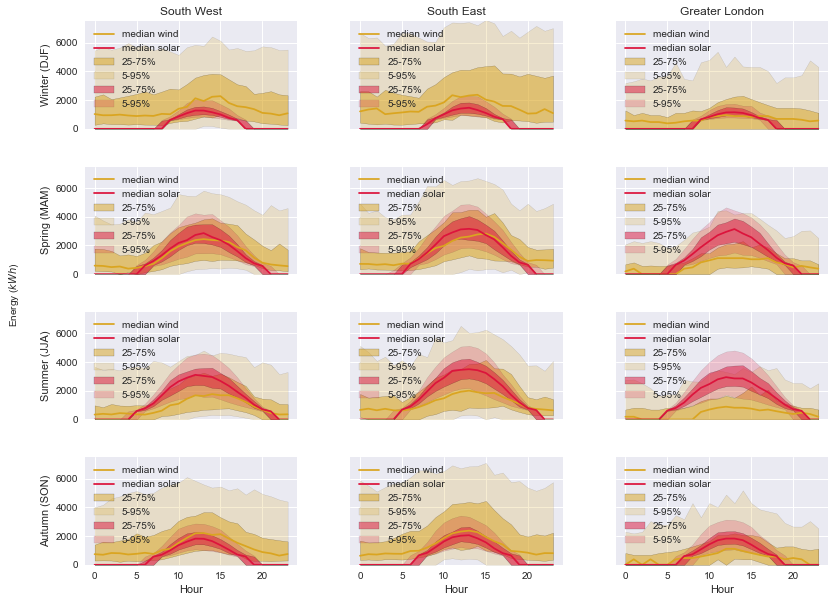

In [18]:
fig,ax =  plt.subplots(4,3,figsize=(12,10), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column_energy[j]]
        y_solar = df_season[solar_column_energy[j]]
        y_demand = df_season[demand_column_energy[j]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color, 'ylim':(0,7500),
                       'xlabel':"Hour", 'ylabel':season['label'],
                       'legend':"wind",'pos':(i,j),'imax':3}
        params_solar = {'color':solar_color, 'ylim':(0,7500),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"solar", 'pos':(i,j),'imax':3}
        params_demand = {'color':demand_color,'ylim':(0,10000),
                         'xlabel':"Hour",'ylabel':season['label'],
                         'legend':"demand",'pos':(i,j),'imax':3}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),
                             'xlabel':"Hour",'ylabel':season['label'],
                             'legend':"wind+solar",'pos':(i,j),'imax':3}
        plot_median_quantiles(y_wind,y_wind.index.hour, ax[i][j],params_wind)
        plot_median_quantiles(y_solar,y_solar.index.hour,ax[i][j],params_solar)
        # plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        # plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png")
#fig.legend(handles, labels, loc='upper right')

Box plot for comparison

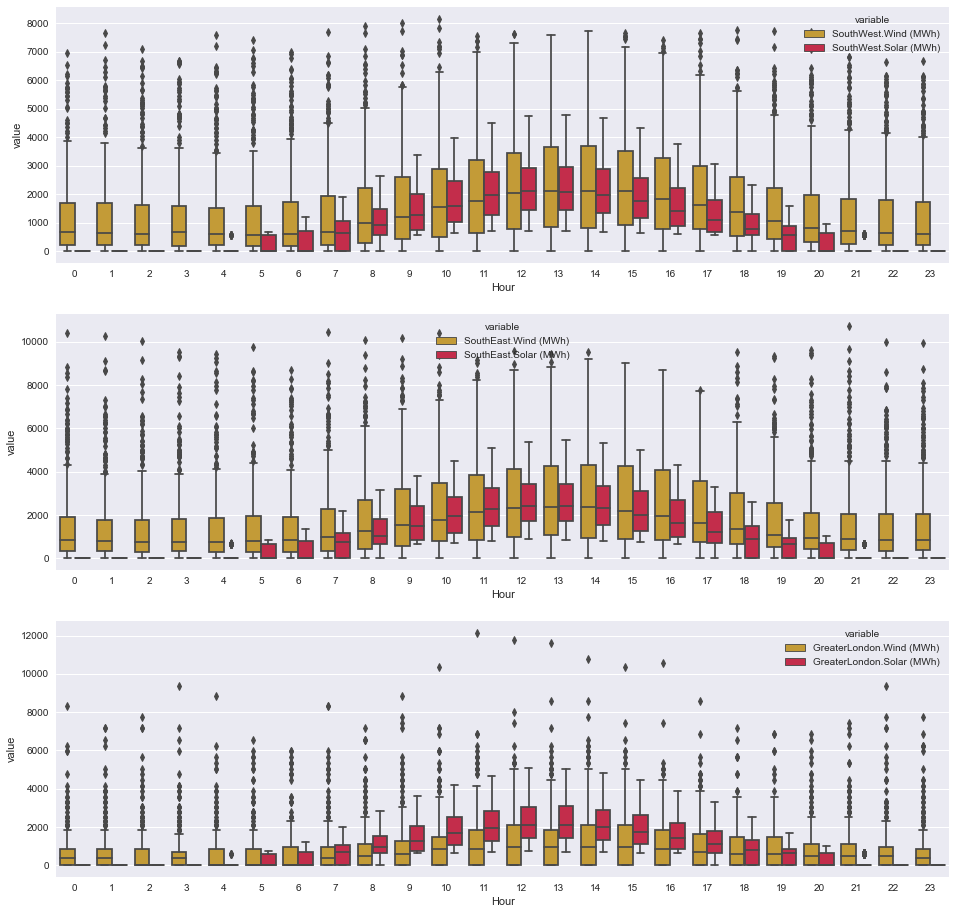

In [64]:

#create figure, and axes
#mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,figsize=(16,16))

for j in [0,1,2]:
    ys_wind_solar = df_proc[[wind_column_energy[j],solar_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=[wind_column_energy[j],solar_column_energy[j]], ignore_index=False)
    sns.boxplot(ax=ax[j], x=ys_w_s.index.hour, y='value', hue="variable", palette=[wind_color, solar_color],data=ys_w_s)
    ax[j].set_xlabel('Hour')
    # y_wind_solar = y_solar + y_wind
    # params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j),'imax':2}
    # params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j),'imax':2}
    # params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j),'imax':2}
    # params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j),'imax':2}
    # plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    # plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    # plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    # plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

# plt.savefig("monthly_distribution_wind_solar_demand.png")

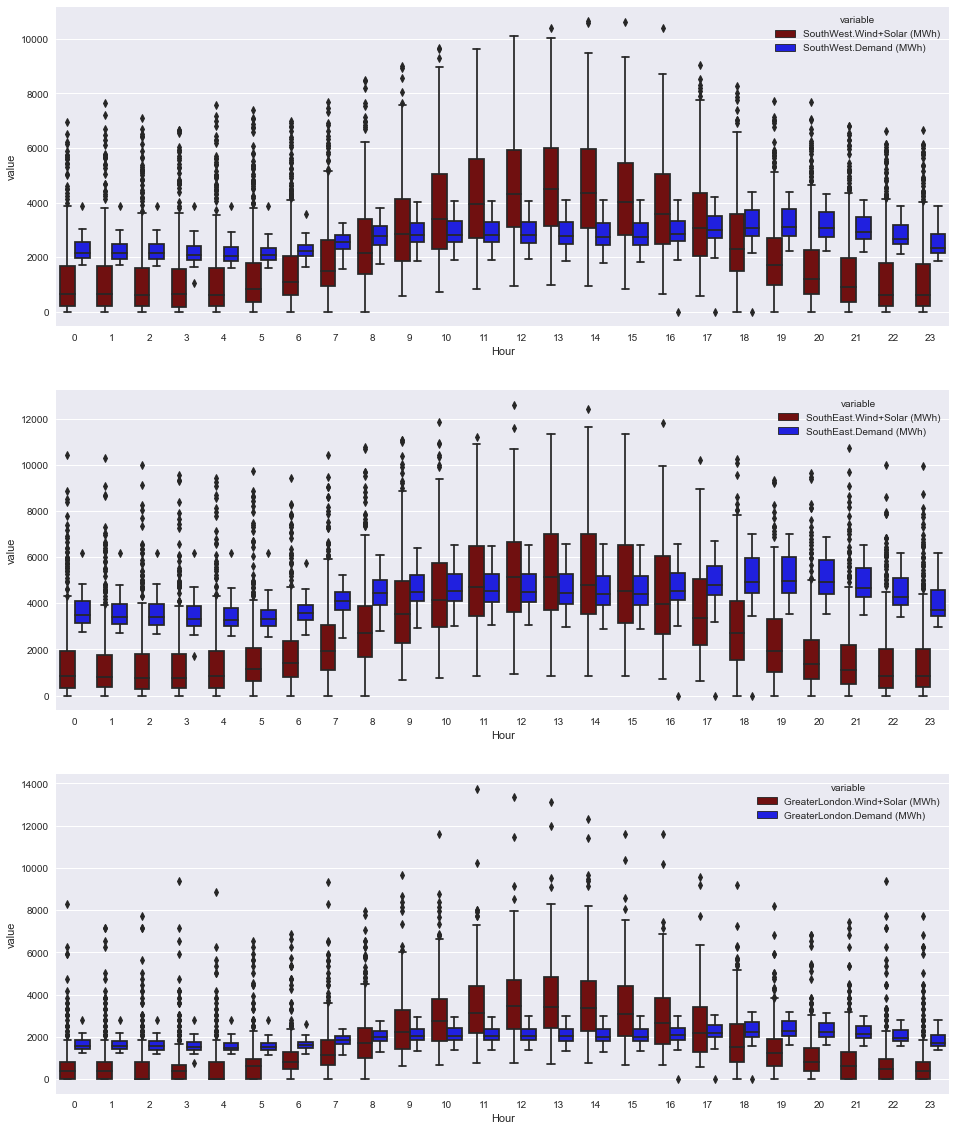

In [67]:

#create figure, and axes
#mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,figsize=(16,20))

for j in [0,1,2]:
    ys_wind_solar = df_proc[[wind_solar_column_energy[j],demand_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=[wind_solar_column_energy[j],demand_column_energy[j]], ignore_index=False)
    sns.boxplot(ax=ax[j], x=ys_w_s.index.hour, y='value', hue="variable", palette=[wind_solar_color, demand_color],data=ys_w_s)
    ax[j].set_xlabel('Hour')
    # y_wind_solar = y_solar + y_wind
    # params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j),'imax':2}
    # params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j),'imax':2}
    # params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j),'imax':2}
    # params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j),'imax':2}
    # plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    # plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    # plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    # plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

# plt.savefig("monthly_distribution_wind_solar_demand.png")

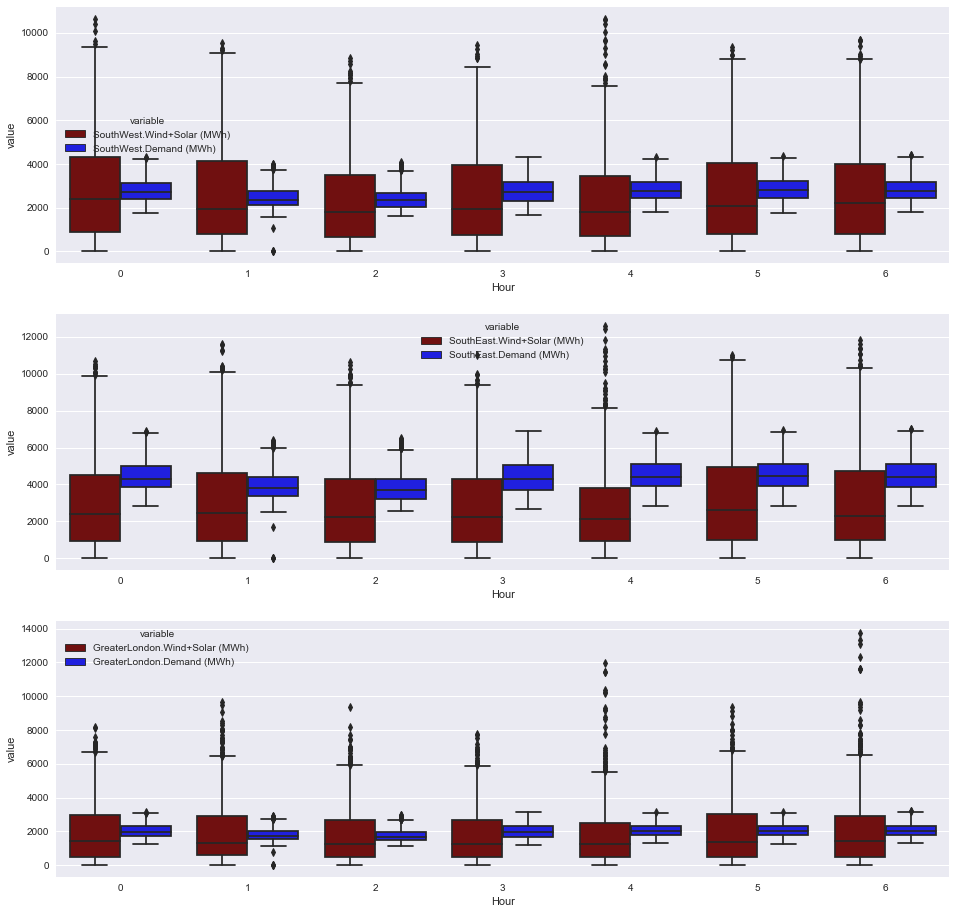

In [65]:

#create figure, and axes
#mpl.style.use('seaborn')
fig,ax =  plt.subplots(3,figsize=(16,16))

for j in [0,1,2]:
    ys_wind_solar = df_proc[[wind_solar_column_energy[j],demand_column_energy[j]]]
    ys_w_s = pd.melt(ys_wind_solar, value_vars=[wind_solar_column_energy[j],demand_column_energy[j]], ignore_index=False)
    sns.boxplot(ax=ax[j], x=ys_w_s.index.dayofweek, y='value', hue="variable", palette=[wind_solar_color, demand_color],data=ys_w_s)
    ax[j].set_xlabel('Hour')
    # y_wind_solar = y_solar + y_wind
    # params_wind = {'color':wind_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"wind",'pos':(0,j),'imax':2}
    # params_solar = {'color':solar_color,'ylim':(0,7500),'ylabel':energy_label,'xlabel':"Month",'legend':"solar",'pos':(1,j),'imax':2}
    # params_demand = {'color':demand_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"demand",'pos':(2,j),'imax':2}
    # params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),'ylabel':energy_label,'xlabel':"Month",'legend':"wind+solar",'pos':(2,j),'imax':2}
    # plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    # plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)
    # plot_median_quantiles(y_demand,y_demand.index.month,ax[2][j],params_demand)
    # plot_median_quantiles(y_wind_solar,y_wind_solar.index.month,ax[2][j],params_wind_solar)

# plt.savefig("monthly_distribution_wind_solar_demand.png")

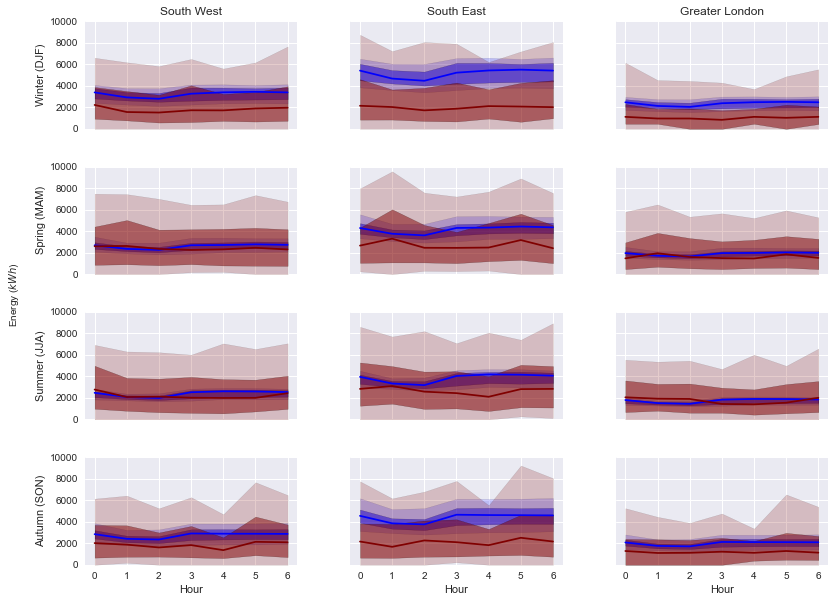

In [68]:
fig,ax =  plt.subplots(4,3,figsize=(12,10), sharey=True, sharex=True)
seasons = [summer, winter, autumn, spring]
for season in seasons:
    i = season['plot_pos']
    df_season = df_proc[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column_energy[j]]
        y_solar = df_season[solar_column_energy[j]]
        y_demand = df_season[demand_column_energy[j]]
        y_wind_solar = y_solar + y_wind
        params_wind = {'color':wind_color, 'ylim':(0,7500),
                       'xlabel':"Hour", 'ylabel':season['label'],
                       'legend':"wind",'pos':(i,j),'imax':3}
        params_solar = {'color':solar_color, 'ylim':(0,7500),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"solar", 'pos':(i,j),'imax':3}
        params_demand = {'color':demand_color,'ylim':(0,10000),
                         'xlabel':"Hour",'ylabel':season['label'],
                         'legend':"demand",'pos':(i,j),'imax':3}
        params_wind_solar = {'color':wind_solar_color,'ylim':(0,10000),
                             'xlabel':"Hour",'ylabel':season['label'],
                             'legend':"wind+solar",'pos':(i,j),'imax':3}
        #plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][i],params_wind)
        #plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][i],params_solar)
        plot_median_quantiles(y_demand,y_demand.index.dayofweek,ax[i][j],params_demand)
        plot_median_quantiles(y_wind_solar,y_wind_solar.index.dayofweek,ax[i][j],params_wind_solar)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.text(-0.02, 0.5, energy_label, va='center', rotation='vertical')
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png")
#fig.legend(handles, labels, loc='upper right')